In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv('data/boston_housing.csv').values
X = dataset[:,:-1]
y = dataset[:,-1]
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [7]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.3,
                                           random_state=1)

In [14]:
# shape 확인
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [8]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,min_samples_split=5,
                        max_features=int(xTrain.shape[1]/2),
                        bootstrap=True,random_state=1)
rf.fit(xTrain,yTrain)
#n_estimators : decission tree의 수, 많으면 많을수록 Overfiting 방지. (사용자 자원(메모리)도 많이 사용함, 무거워 질 수 있음)

RandomForestRegressor(max_features=6, min_samples_split=5, random_state=1)

In [9]:
yTrainPred=rf.predict(xTrain)
yTestPred=rf.predict(xTest)

In [10]:
from sklearn.metrics import mean_squared_error
print('[train mse]: ', mean_squared_error(yTrain,yTrainPred))
print('[test mse]: ', mean_squared_error(yTest,yTestPred))

[train mse]:  2.329427884786726
[test mse]:  8.986427416728974


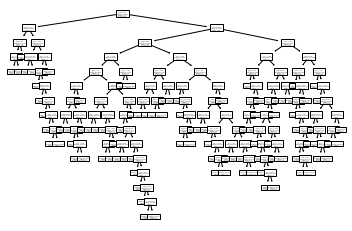

In [11]:
from sklearn.tree import plot_tree
# RandomForestRegressor.estimators_[i] : i 번째 decision tree
rfTree = rf.estimators_[0]
plot_tree(rfTree)
plt.show()


In [12]:
# RandomForestRegressor.estimators_[i] = DecisionTreeRegressor의 객체
# DecisionTreeRegressor과 동일하게 attribute 사용 가능

idx=99
print(rf.estimators_[idx].tree_.node_count)
print(rf.estimators_[idx].tree_.children_left)
print(rf.estimators_[idx].tree_.children_right)
print(rf.estimators_[idx].tree_.feature)
print(rf.estimators_[idx].tree_.threshold)
print(rf.estimators_[idx].tree_.value)

173
[  1   2   3   4  -1  -1   7  -1  -1  10  11  -1  13  14  -1  16  17  -1
  -1  -1  -1  -1  23  24  25  26  27  28  29  -1  31  -1  33  -1  -1  -1
  -1  38  39  -1  41  42  -1  44  45  -1  -1  -1  49  -1  51  52  53  -1
  55  -1  57  -1  -1  60  -1  62  -1  -1  65  66  67  -1  -1  70  -1  -1
  73  74  -1  -1  -1  78  -1  80  81  82  83  -1  85  -1  -1  88  -1  -1
  -1  92  -1  94  95  -1  97  98  -1 100  -1  -1  -1  -1  -1 106 107  -1
  -1 110 111 112 113  -1  -1 116  -1 118  -1  -1  -1  -1 123 124 125 126
 127 128  -1 130 131  -1  -1  -1 135 136  -1  -1  -1  -1 141  -1  -1 144
  -1 146 147  -1  -1 150  -1  -1 153 154 155  -1  -1 158  -1  -1 161 162
 163  -1  -1 166 167  -1 169  -1  -1  -1  -1]
[ 22   9   6   5  -1  -1   8  -1  -1  21  12  -1  20  15  -1  19  18  -1
  -1  -1  -1  -1 122 105 104  37  36  35  30  -1  32  -1  34  -1  -1  -1
  -1  77  40  -1  48  43  -1  47  46  -1  -1  -1  50  -1  64  59  54  -1
  56  -1  58  -1  -1  61  -1  63  -1  -1  72  69  68  -1  -1  71  -1  -1
 